<a href="https://colab.research.google.com/github/kohi2112002/WineQuality/blob/FINAL/WineQuality_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone **DATA**


In [ ]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [ ]:
!git clone https://github.com/kohi2112002/WineQuality.git

Cloning into 'WineQuality'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 39 (delta 19), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [ ]:
# upload file to drive
red_path = '/content/WineQuality/winequality-red.csv'
white_path = '/content/WineQuality/winequality-white.csv'

In [ ]:
# read file into dataframe
red_df = pd.read_csv(red_path)
white_df = pd.read_csv(white_path)
full = pd.concat([red_df, white_df])

In [ ]:
# check 
print(red_df.shape)
print(white_df.shape)

(1599, 12)
(4898, 12)


# **Check data**

Text(0.5, 1.0, 'Correlation between variables')

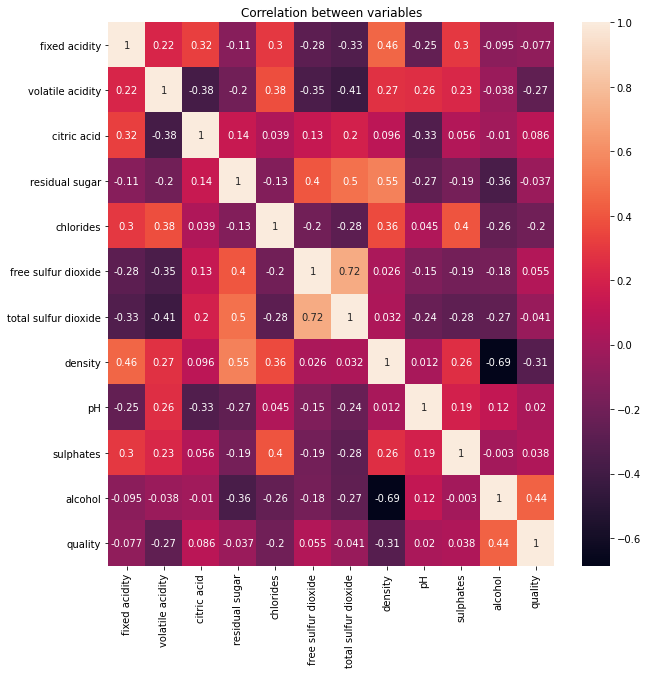

In [ ]:
#Check correlation
corr = full.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

In [ ]:
corr_vec = full.corr()['quality']
print(abs(corr_vec) > 0.05)
print((abs(corr_vec)).idxmin())

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide    False
density                  True
pH                      False
sulphates               False
alcohol                  True
quality                  True
Name: quality, dtype: bool
pH


In [ ]:
#Remove not needed data
opt_data = full.drop(['residual sugar','pH','sulphates','total sulfur dioxide'], axis = 1)

In [ ]:
#This function calculate the 
def re_cm(cnf_matrix):
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)

  return [np.mean(ACC), np.mean(TPR), np.mean(FPR), np.mean(FNR), np.mean(PPV)]

In [ ]:
#Scale data with MinMax Scaler
scaler = MinMaxScaler()

#this function return scaled data
def Khoi_Scaler(data):
  scaler.fit(data)
  return scaler.transform(data)

In [ ]:
#Scale data with Robust Scaler
transform = RobustScaler()

#this funtion return scaled data
def Khoi_Robust(data):
  return transform.fit_transform(data)

In [ ]:
#Scale data with Standard Scaler
khoi_scaler = StandardScaler()

#this function return data scaled by Standard Scaler
def Khoi_SD_Scaler(data):
  return khoi_scaler.fit_transform(data)

In [ ]:
#this function return Standard Deviation
def KHOI_standard_deviation(y_true, y_pred):
  if(len(y_true) != len(y_pred)):
    print("Error")
  N = len(y_true)
  mean_y_true = np.mean(y_true, dtype=np.float64)
  mean_array = np.array([mean_y_true for i in range(N)])
  distance = (y_pred - mean_array)
  sum_dis = distance @ distance.T
  mean_sum_dis = sum_dis/N
  return math.sqrt(mean_sum_dis)

In [ ]:
#This function return accuracy rate
def KHOI_Accuracy(y_true, y_pred):
		m = np.size(y_true)
		error = y_pred - y_true 
		return (1/(2*m)) * (np.transpose(error)@error)

In [ ]:
#This function print the linear regression equation 
def Khoi_LE(para):
  return ('Y = {}X'.format(para))

In [ ]:
#Data partition

#This is function return train and target data set
def needed_data(data, target_label, index):
  #Scale data
  data = Khoi_Robust(data)
  # data = Khoi_SD_Scaler(data)
  # data = Khoi_Scaler(data)
  #split data
  X_train_full1, X_test_full1,Y_train_full1,Y_test_full1 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 100)
  X_train_full2, X_test_full2,Y_train_full2, Y_test_full2 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 220)
  X_train_full3, X_test_full3,Y_train_full3,Y_test_full3 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 343)
  #store data
  X_train_full = [X_train_full1, X_train_full2, X_train_full3]
  X_test_full = [X_test_full1, X_test_full2, X_test_full3]
  Y_train_full = [Y_train_full1, Y_train_full2, Y_train_full3]
  Y_test_full = [Y_test_full1, Y_test_full2, Y_test_full3]  
  #return data
  return [X_train_full, X_test_full, Y_train_full, Y_test_full]

In [ ]:
#This function plot comparision
def Khoi_Plot(y_true, y_pred, _in, label):
  plt.figure(figsize=(50,3))
  plt.figure(_in)
  plt.title(label, fontsize='xx-large')
  plt.plot(y_true, color='green')
  plt.plot(y_pred, color='red')

# **Linear Regresstion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7



The Linear Regression Equation of fixed acidity in 0th test: 
Y = [ 0.09407278  0.32148013  0.04584775 -0.33550538  0.89524609  0.41615407
  0.00441045]X
The RMSE of fixed acidity in 0th test: 0.6911071854919348
The SD of fixed acidity in 0th test: 0.634890120752638
The Confusion matrix of fixed acidity in 0th test: 
[[  4  35   0   0   0   0]
 [  7 501  14   1   0   0]
 [  1  40  13   0   0   0]
 [  0   2  19   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0   2   1   0   0]]
The Accuracy is: 0.9323076923076924 
The True positive rate is: 0.2168733056241023 
The False Positive Rate is: 0.11630190442356035 
The False Negative Rate is:0.7831266943758978 
The Precision is nan

The Mean Performance of fixed acidity in 0th test: nan




The Linear Regression Equation of fixed acidity in 1th test: 
Y = [ 0.0831645   0.32313494  0.06256915 -0.33166079  0.90250715  0.4418285
 -0.01201853]X
The RMSE of fixed acidity in 1th test: 0.7222118408243273
The SD of fixed acidity in 1th test: 0.68340

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7



The Linear Regression Equation of citric acid in 0th test: 
Y = [ 0.42121593 -0.53242217  0.10917745  0.17288502  0.12476521  0.21896369
 -0.04004255]X
The RMSE of citric acid in 0th test: 0.7866011453619197
The SD of citric acid in 0th test: 0.5996345057034923
The Confusion matrix of citric acid in 0th test: 
[[  0   9  19   0   0   0]
 [  2  14  36   0   0   0]
 [  0   1 459  13   0   0]
 [  0   1  66   9   3   0]
 [  0   0  10   4   0   0]
 [  0   0   3   1   0   0]]
The Accuracy is: 0.9138461538461539 
The True positive rate is: 0.22559275186593408 
The False Positive Rate is: 0.13581880894496876 
The False Negative Rate is:0.7744072481340659 
The Precision is nan

The Mean Performance of citric acid in 0th test: nan




The Linear Regression Equation of citric acid in 1th test: 
Y = [ 0.41845183 -0.5361496   0.08903496  0.16430078  0.13265299  0.20851285
 -0.03633542]X
The RMSE of citric acid in 1th test: 0.8669070443464254
The SD of citric acid in 1th test: 0.5973608646494724
T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7



The Linear Regression Equation of free sulfur dioxide in 0th test: 
Y = [-0.25282114 -0.17234297  0.09943072 -0.06078106  0.22062481 -0.16369698
  0.0527094 ]X
The RMSE of free sulfur dioxide in 0th test: 0.6243119572637147
The SD of free sulfur dioxide in 0th test: 0.3588288484726096
The Confusion matrix of free sulfur dioxide in 0th test: 
[[  0  15   0   0   0   0]
 [  1 562   0   0   0   0]
 [  0  69   0   0   0   0]
 [  0   1   0   0   0   0]
 [  0   1   0   0   0   0]
 [  0   1   0   0   0   0]]
The Accuracy is: 0.9548717948717949 
The True positive rate is: 0.16637063351095324 
The False Positive Rate is: 0.16692913385826771 
The False Negative Rate is:0.8336293664890467 
The Precision is nan

The Mean Performance of free sulfur dioxide in 0th test: nan




The Linear Regression Equation of free sulfur dioxide in 1th test: 
Y = [-0.24985093 -0.17537593  0.09557954 -0.0653593   0.21736122 -0.15257842
  0.04018963]X
The RMSE of free sulfur dioxide in 1th test: 0.6506237590223732

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/pyt



The Linear Regression Equation of alcohol in 0th test: 
Y = [ 0.12506974  0.15856051  0.05022495 -0.05136037 -0.06528673 -0.73527124
  0.21119917]X
The RMSE of alcohol in 0th test: 0.3815743347742968
The SD of alcohol in 0th test: 0.514457575391258
The Confusion matrix of alcohol in 0th test: 
[[  0   0   0   0   0]
 [  0   0   3   0   0]
 [  1   3 567   1   0]
 [  0   0  50  24   0]
 [  0   0   0   1   0]]
The Accuracy is: 0.9636923076923077 
The True positive rate is: nan 
The False Positive Rate is: 0.13782692968203014 
The False Negative Rate is:nan 
The Precision is nan

The Mean Performance of alcohol in 0th test: nan




The Linear Regression Equation of alcohol in 1th test: 
Y = [ 0.13079525  0.15942427  0.04766609 -0.05117338 -0.05995764 -0.73993803
  0.21719598]X
The RMSE of alcohol in 1th test: 0.4250262619558894
The SD of alcohol in 1th test: 0.5315300633347247
The Confusion matrix of alcohol in 1th test: 
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  1  14 542   3   

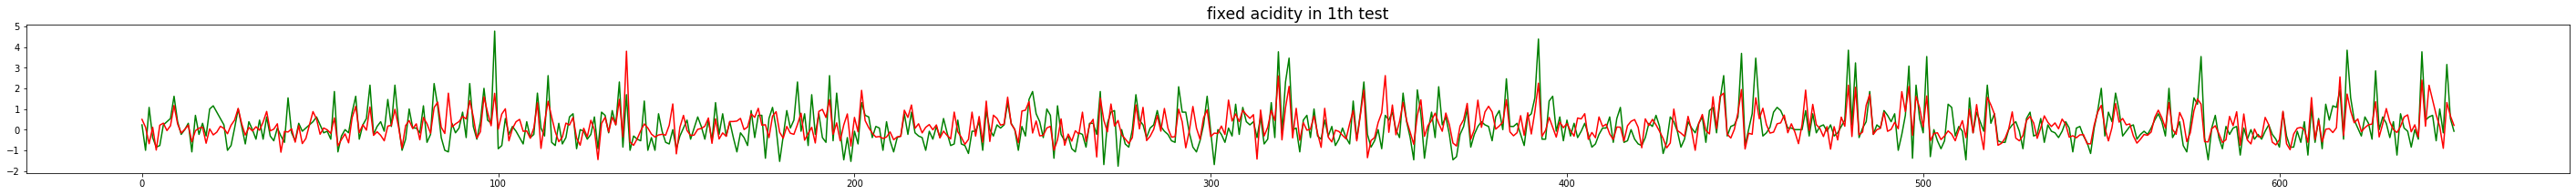

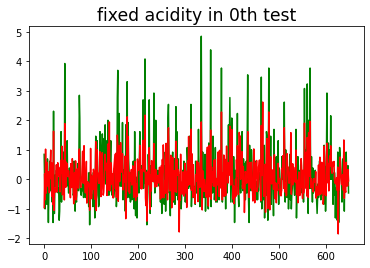

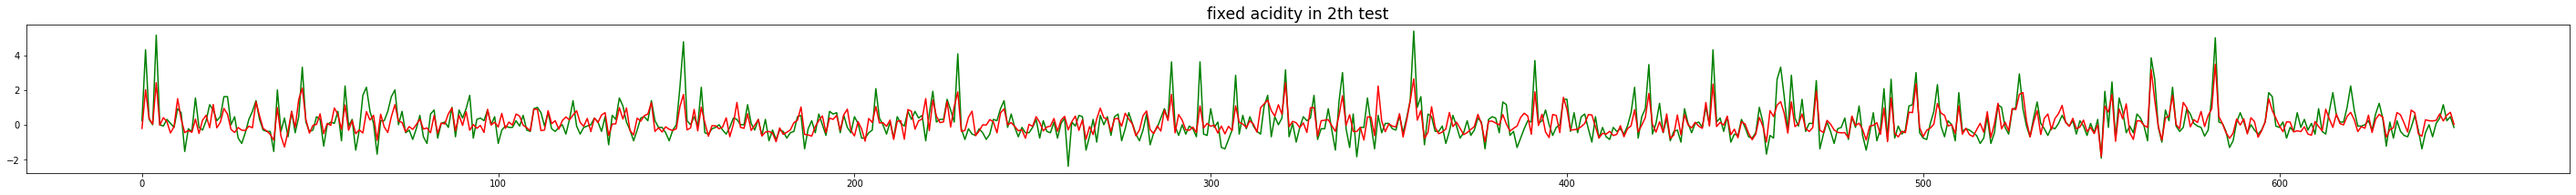

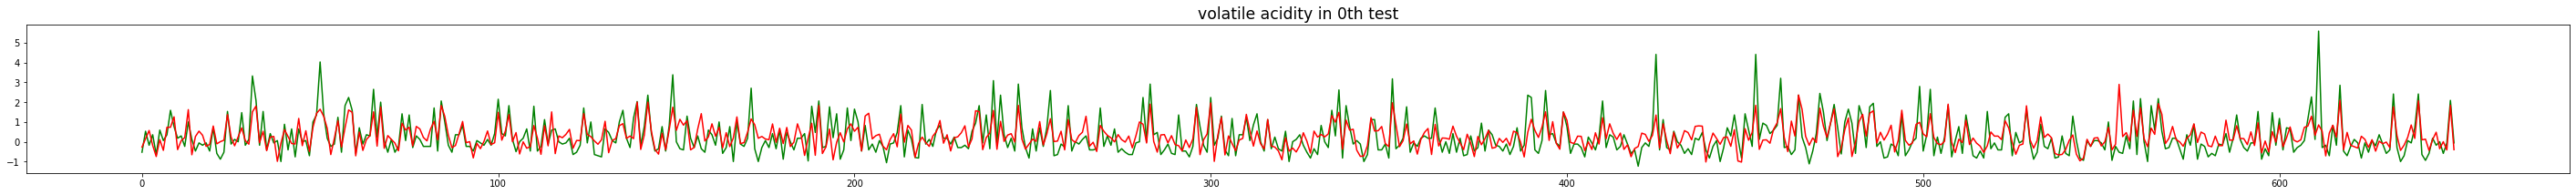

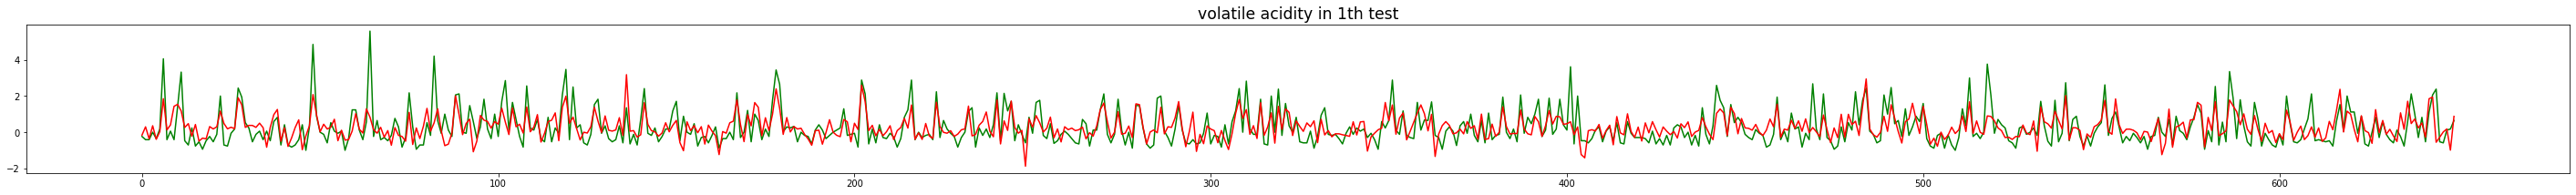

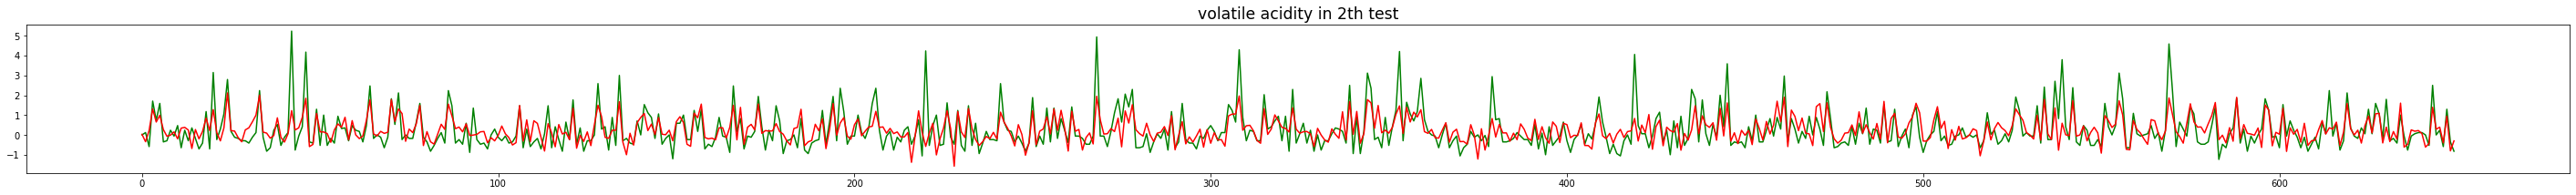

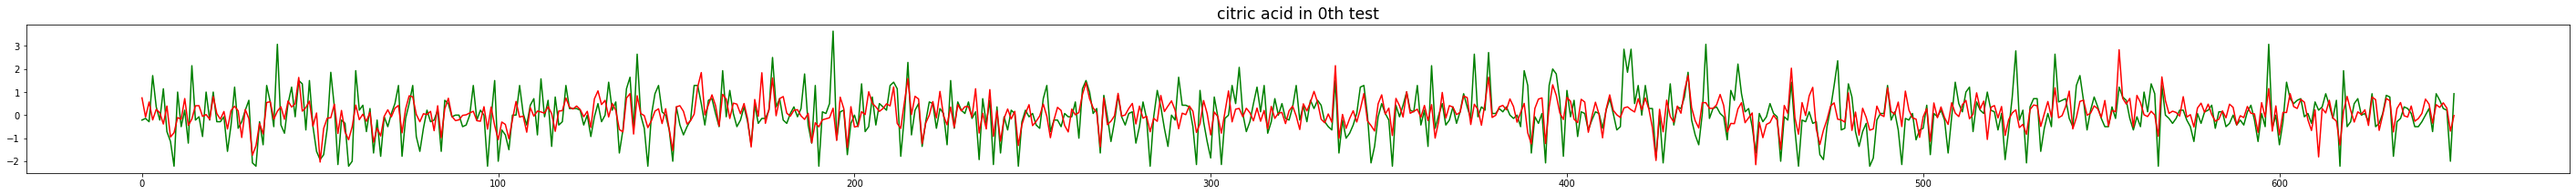

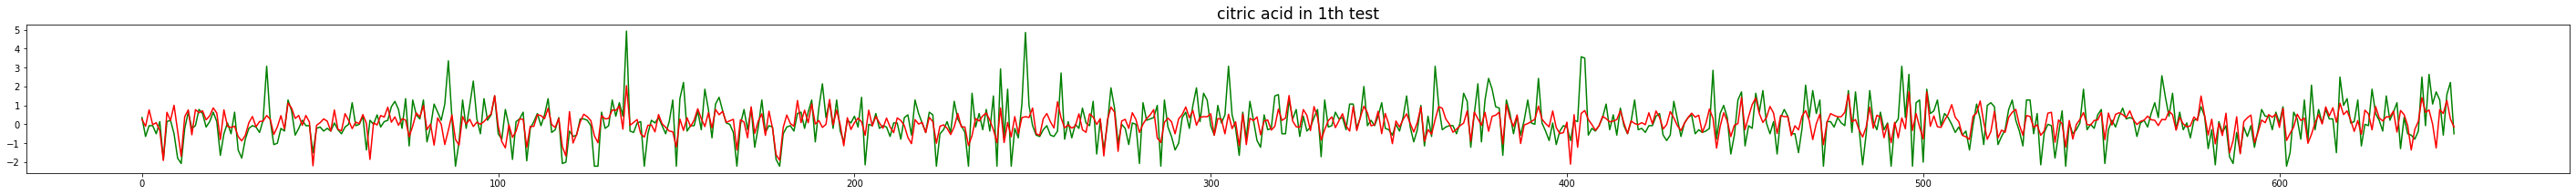

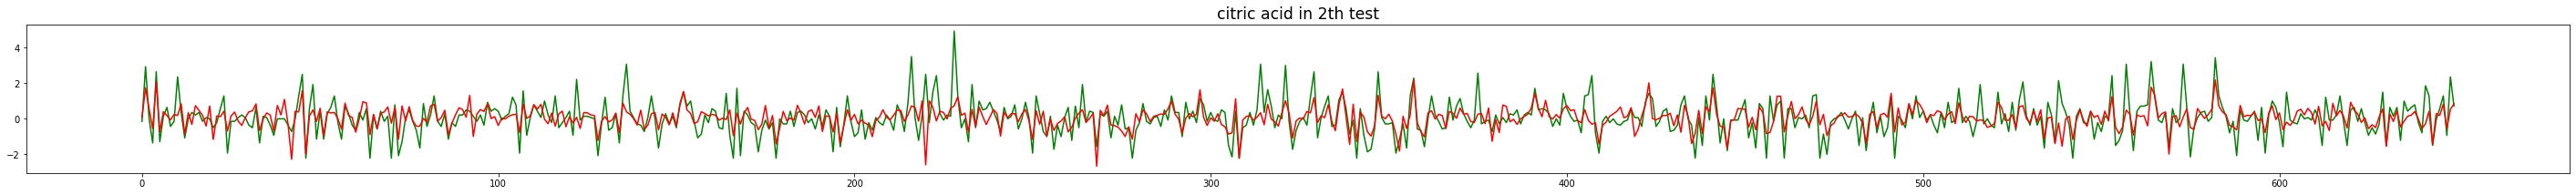

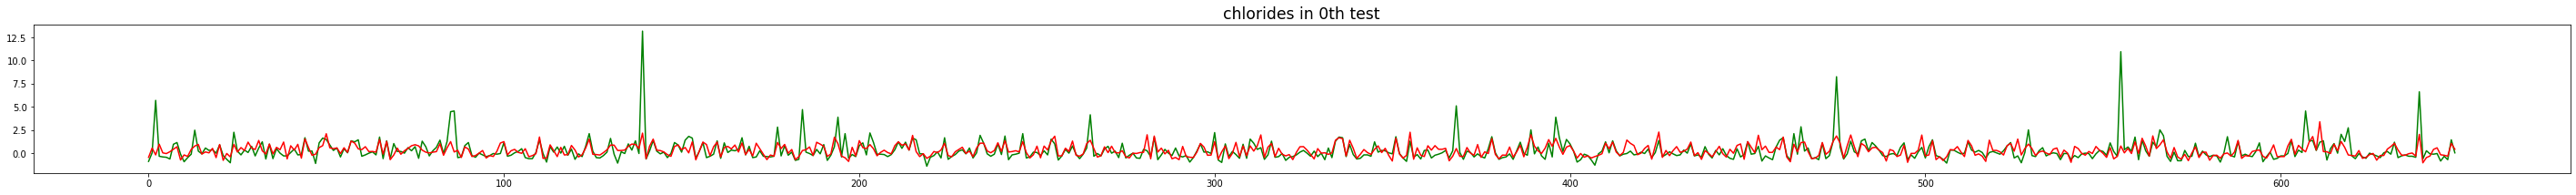

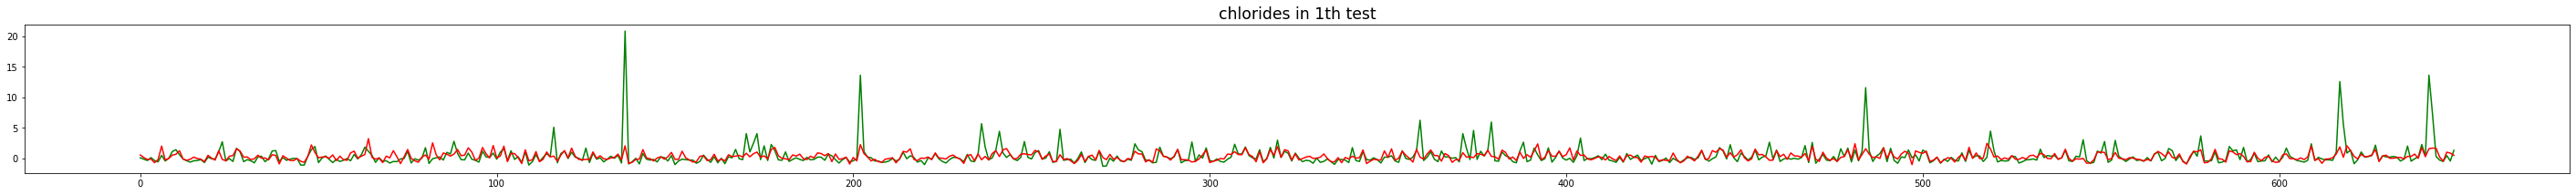

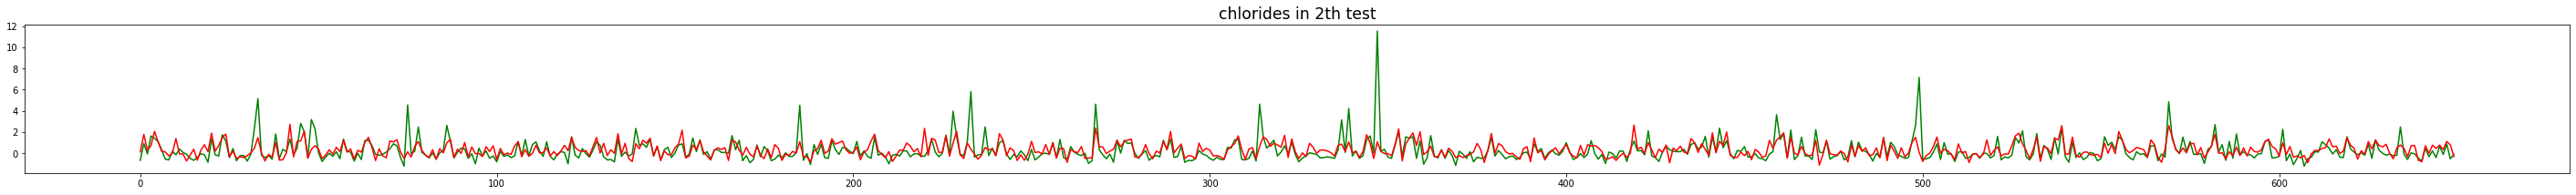

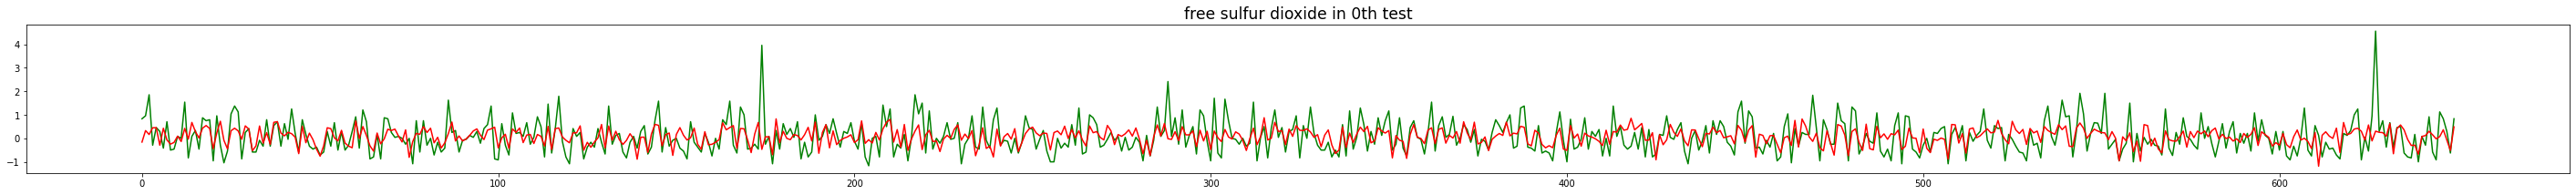

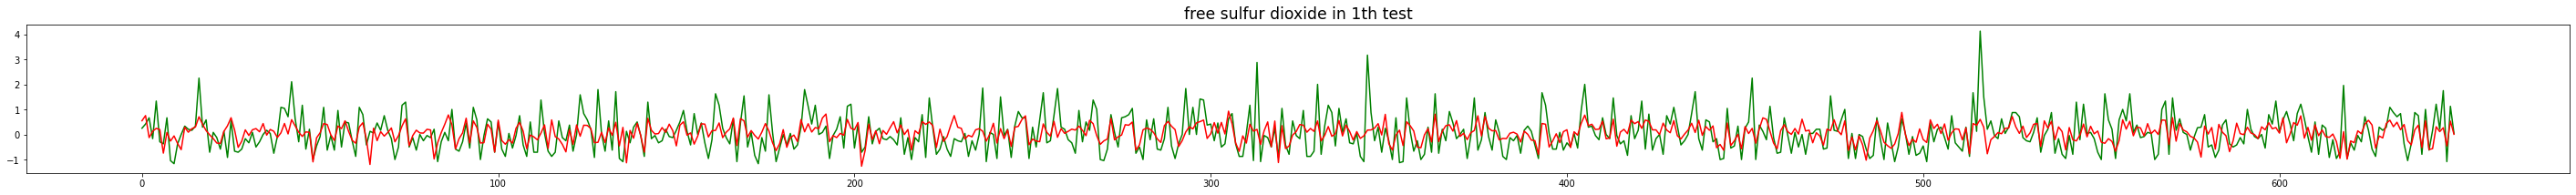

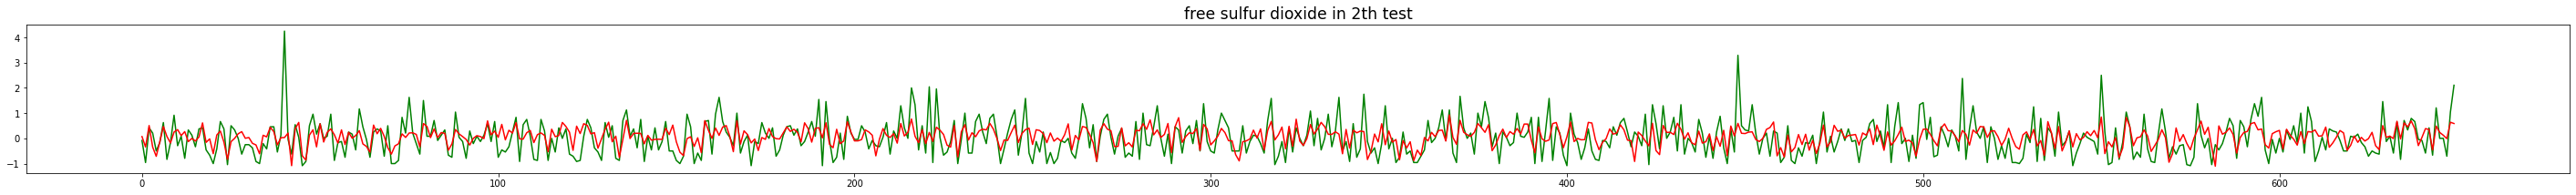

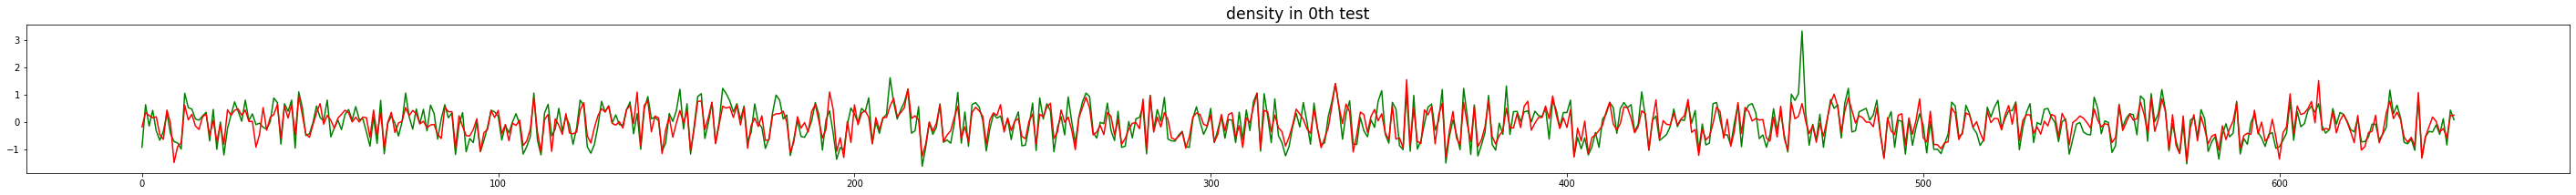

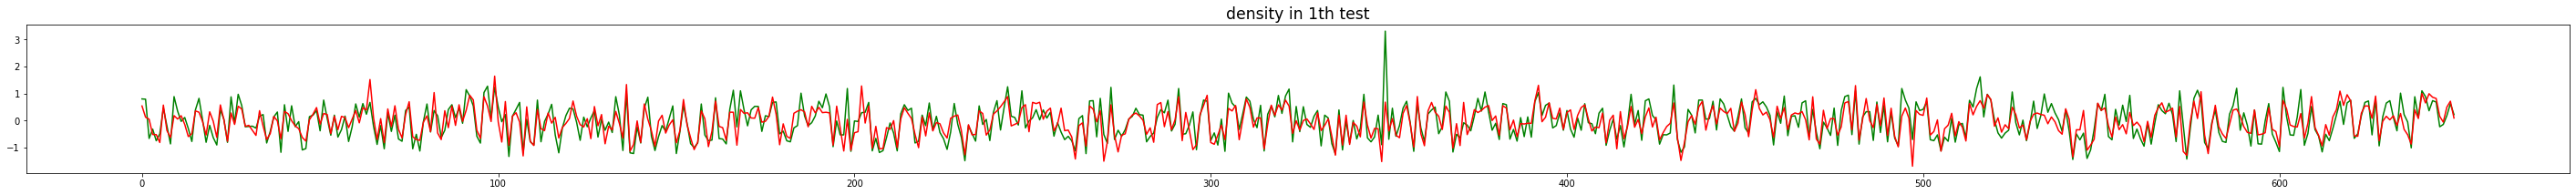

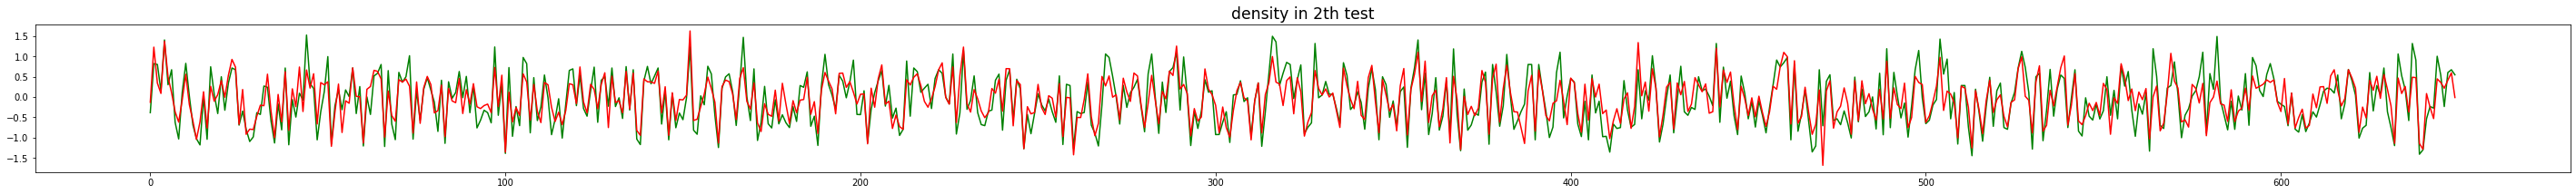

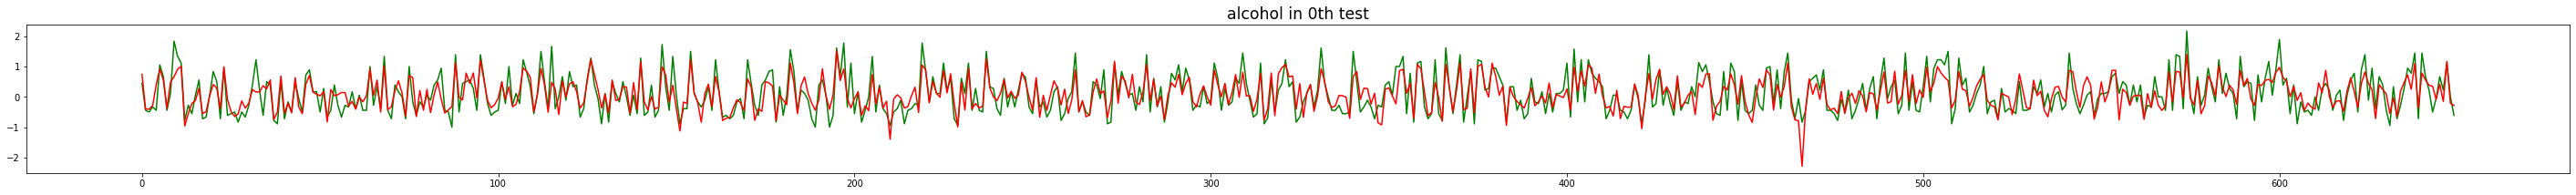

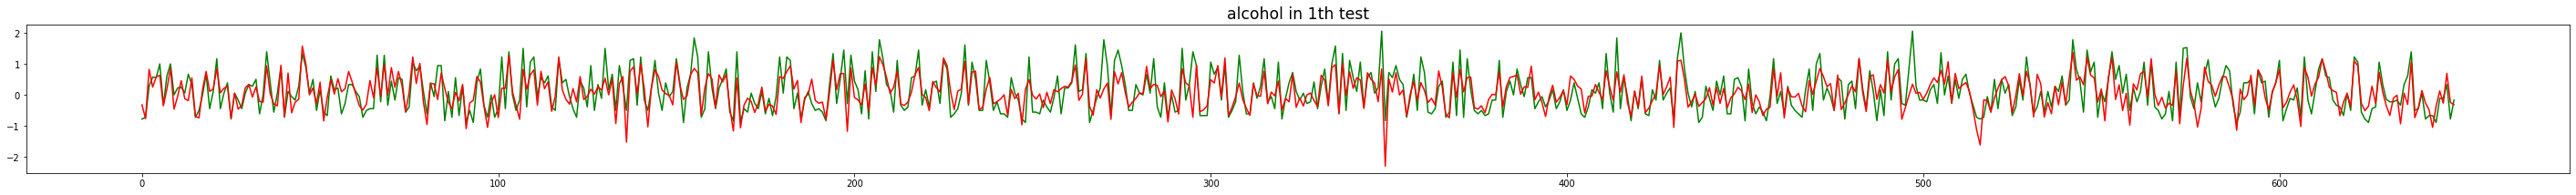

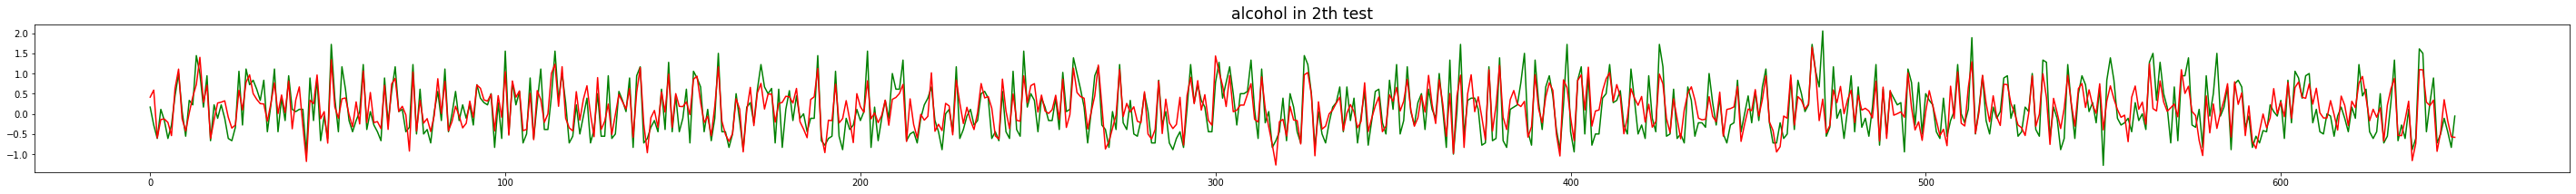

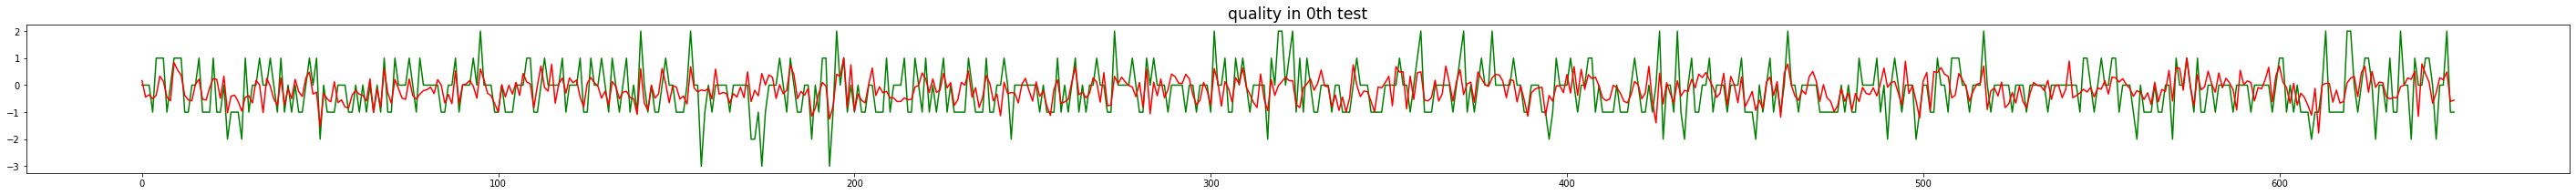

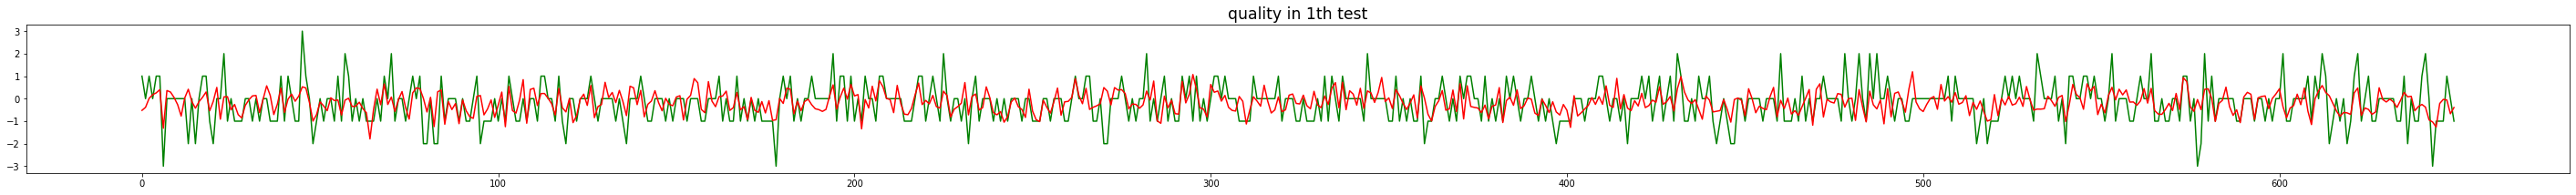

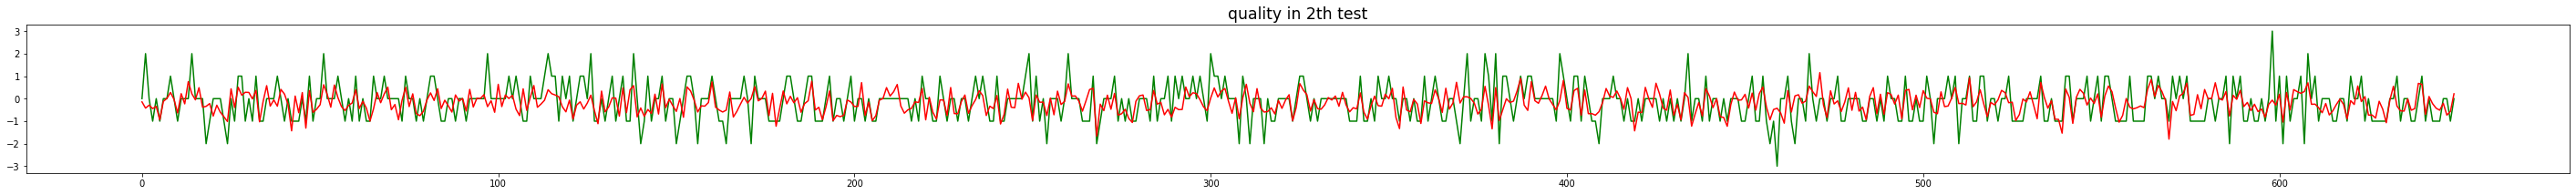

<Figure size 3600x216 with 0 Axes>

In [ ]:
all_label_target = opt_data.columns
len_target = len(all_label_target)
index = 0
k = 0
while index < len_target:
  # Get needed data
  [X_train, X_test, Y_train, Y_test] = needed_data(opt_data, all_label_target[index], index)
  #Train
  j = 0
  while j < len(X_train):
    reg = LinearRegression().fit(X_train[j], Y_train[j])
    y_pred = reg.predict(X_test[j])
    rmse = math.sqrt(mean_squared_error(Y_test[j], y_pred))
    SD = KHOI_standard_deviation(Y_test[j], y_pred)
    acc = (r2_score(Y_test[j], y_pred) * 100)
    cmatrix = confusion_matrix(Y_test[j].astype(int), y_pred.astype(int))
    cal = re_cm(cmatrix)
    pra = reg.coef_
    print('\n')
    print("The Linear Regression Equation of {0} in {1}th test: \n{2}".format(all_label_target[index],j, Khoi_LE(pra)))
    print("The RMSE of {0} in {1}th test: {2}".format(all_label_target[index], j, rmse))
    print("The SD of {0} in {1}th test: {2}".format(all_label_target[index], j, SD))
    print("The Confusion matrix of {0} in {1}th test: \n{2}".format(all_label_target[index], j, cmatrix))
    print("The Accuracy is: {0} \nThe True positive rate is: {1} \nThe False Positive Rate is: {2} \nThe False Negative Rate is:{3} \nThe Precision is {4}\n".format(float(cal[0]), float(cal[1]), float(cal[2]), float(cal[3]), float(cal[4])))
    print("The Mean Performance of {0} in {1}th test: {2}".format(all_label_target[index], j, mean(cal[1:])))
    print('\n')
    Khoi_Plot(Y_test[j], y_pred, k, "{0} in {1}th test".format(all_label_target[index], j))
    k += 1
    j += 1
  index += 1